# 导入包

In [1]:
import torch
import numpy as np
import random
from torch.utils.data import  Dataset,random_split,DataLoader
import matplotlib.pyplot as plt
import torch.nn as nn

# 全局变量

In [2]:
batch_size=1000
lr  = 0.1
epoch_num = 200

# 构造数据集
满足7000用于训练 3000用于测试

In [3]:
random.seed(42)
torch.manual_seed(42)
class CategoryDataset(Dataset):
    def __init__(self):
        self.num_sample = 5000
        self.num_features = 200
        self.x_1 = torch.normal(2,1,(self.num_sample,self.num_features))
        self.y_1 = torch.ones(self.num_sample,1)

        self.x_2 = torch.normal(2,1,(self.num_sample,self.num_features))
        self.y_2 = torch.ones(self.num_sample,1)
        self.X = torch.cat((self.x_1,self.x_2),0)
        self.Y = torch.cat((self.y_1,self.y_2),0)
    def __len__(self):
        return self.num_sample*2
    def __getitem__(self, index):
        return self.X[index],self.Y[index]
train_size = 7000
test_size = 10000 - train_size
dataset = CategoryDataset()
print(len(dataset))
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
print("训练集样本数:", len(train_dataset))
print("测试集样本数:", len(test_dataset))
train_loader= DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader=DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

10000
训练集样本数: 7000
测试集样本数: 3000


# 定义激活函数 定义网络结构 定义网络初始化参数
# 定义损失函数 定义优化器

In [4]:
inputs = 200
hiddens = 128
out = 1
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(inputs,hiddens)
        self.hidden = torch.nn.Linear(hiddens,out)
        self.relu = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()
    def forward(self,x):
        t = self.linear(x)
        t = self.relu(t)
        t = self.hidden(t)
        t = self.sigmoid(t)
        return  t
net = Net()

loss =  torch.nn.BCELoss()
sgd = torch.optim.SGD(params=net.parameters(),lr=lr)



# 训练

In [5]:
import time

train_loss =[]
test_loss = []
train_acc=[]
test_acc= []
start_time = time.time()
for epoch in range(epoch_num):
    acc_list =[]
    loss_list=[]
    for x,y in train_loader:
        y_hat = net(x)

        l = loss(y_hat,y)
        sgd.zero_grad()
        l.backward()
        sgd.step()
        loss_list.append(l.item())
        # 准确度评估
        acc =0
        for index in range(y.size()[0]):
            tt = 0
            if y_hat[index]>0.5:
                tt=1
            if tt == y[index]:
                acc+=1
        acc_list.append(acc/y.size()[0])
    train_loss_mean=np.mean(loss_list)
    train_acc_mean=np.mean(acc_list)
    train_loss.append(train_loss_mean)
    train_acc.append(train_acc_mean)

    acc_list =[]
    loss_list=[]
    for x,y in test_loader:
        y_hat = net(x)

        l = loss(y_hat,y)

        loss_list.append(l.item())
        # 准确度评估
        acc =0
        for index in range(y.size()[0]):
            tt = 0
            if y_hat[index]>0.5:
                tt=1
            if tt == y[index]:
                acc+=1
        acc_list.append(acc/y.size()[0])
    test_loss_mean=np.mean(loss_list)
    test_acc_mean=np.mean(acc_list)
    test_loss.append(test_loss_mean)
    test_acc.append(test_acc_mean)
    print("epoch:",epoch+1,"\n","train_loss:",train_loss_mean,"train_acc",train_acc_mean
          ,"\n",
          "test_loss:",test_loss_mean,"test_acc",test_acc_mean
          )
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

epoch: 1 
 train_loss: 0.08657404757624525 train_acc 0.9762857142857142 
 test_loss: 9.949395219640185e-05 test_acc 1.0
epoch: 2 
 train_loss: 0.00010018823689149161 train_acc 1.0 
 test_loss: 9.596645880568151e-05 test_acc 1.0
epoch: 3 
 train_loss: 9.669064768656556e-05 train_acc 1.0 
 test_loss: 9.266887839961176e-05 test_acc 1.0
epoch: 4 
 train_loss: 9.34177203037377e-05 train_acc 1.0 
 test_loss: 8.958009372387703e-05 test_acc 1.0
epoch: 5 
 train_loss: 9.03485290889096e-05 train_acc 1.0 
 test_loss: 8.66808695718646e-05 test_acc 1.0
epoch: 6 
 train_loss: 8.746582586484562e-05 train_acc 1.0 
 test_loss: 8.395469922106713e-05 test_acc 1.0
epoch: 7 
 train_loss: 8.475243833215375e-05 train_acc 1.0 
 test_loss: 8.138541306834668e-05 test_acc 1.0
epoch: 8 
 train_loss: 8.219415550619098e-05 train_acc 1.0 
 test_loss: 7.896233485856403e-05 test_acc 1.0
epoch: 9 
 train_loss: 7.977830058994837e-05 train_acc 1.0 
 test_loss: 7.667163057097544e-05 test_acc 1.0
epoch: 10 
 train_loss: 7.

# 模型评估
训练用时 125.51 秒
根据实验结果，随着训练的进行，损失（loss）在每个epoch中都在减小，从初始值约为9.95e-05逐渐减小到约为1.05e-05，这显示了模型在训练数据上的逐渐优化。

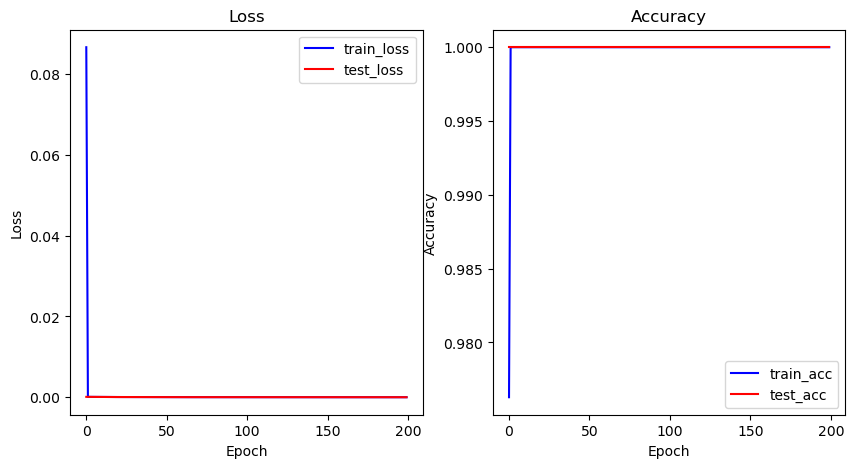

In [6]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, 'b-',label="train_loss")
plt.plot(test_loss, 'r-' ,label="test_loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_acc, 'b-',label="train_acc")
plt.plot(test_acc, 'r-' ,label="test_acc")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()